# Toronto Historical Weather Web Scraping

In [2]:
#Import libraries
import urllib.request
from bs4 import BeautifulSoup

In [14]:
#Government of Canada Website 
page = 'http://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2018&Day=7&Year=2018&Month=1#'
#Query the site
f=urllib.request.urlopen(page).read()
#Parse the page using beautiful soup
soup = BeautifulSoup(f, 'html.parser')
#Find the option for year and month
option = soup.find_all('div', class_='col-md-6 col-sm-6 col-xs-6 text-center mrgn-tp-md mrgn-bttm-md')
option=option[0]
option=option.find_all('option', selected=True)
year=option[0]
year=year.find(text=True)
month=option[1]
month=month.find(text=True)
#Find the table
#table = soup.find_all('div', class_='table-responsive')
table = soup.find_all('table')
#Find the titles
th_all = soup.find_all('th')
result = []
for th in th_all:
    result.append(th.find('abbr', text=True))

title=[]
for abbr in result:
    if abbr is not None:
        title.append(abbr.string)
#clean up title
for i in range(len(title)):
    if title[i]=='mm':
        title[i]="Total Rain"
    elif title[i]=='cm':
        title[i]="Total Snow"
#Get row data
table_body = soup.find('tbody')
tr = table_body.find_all('tr')
td=[]
date=[]
data=[]
for row in tr:
    d=[]
    for r in row.find_all('td'):
        date.append(r.find('abbr'))
        d.append(r.string)
    data.append(d)

#clean date arrays
t=[]
for d in date:
    if d is not None:
        t.append(d.get('title'))
#Convert to date
from datetime import datetime
date=[]
for j in t:
    date.append(datetime.strptime(j, '%B %d, %Y'))

#clean up data array
for entry in data:
    if entry == []:
        data.remove(entry)
    
for entry in data:
    if len(entry)>11:
        entry.pop(0)
                

for rm in range(len(data)-len(date)):
    data.pop(len(data)-1)
    rm -=1

for rm in range(len(title)-len(data[0])):
    title.pop(len(title)-1)
    rm-=1
    
print(data)
import pandas as pd
import numpy as np

df = pd.DataFrame(data=data,index=date,columns=title)
print(df)

[['-8.7', '-21.3', '-15.0', '33.0', '0.0', '0.0', None, None, '11', '28', '54'], ['-7.8', '-13.1', '-10.5', '28.5', '0.0', '0.0', '1.0', '1.0', '11', '24', '59'], ['-6.3', '-13.5', '-9.9', '27.9', '0.0', '0.0', None, None, '10', '22', '44'], ['-8.9', '-20.5', '-14.7', '32.7', '0.0', '0.0', None, None, '9', '32', '65'], ['-15.0', '-23.0', '-19.0', '37.0', '0.0', '0.0', None, None, '8', '31', '50'], ['-16.4', '-23.5', '-20.0', '38.0', '0.0', '0.0', '0.0', '0.0', '7', '30', '32'], ['-2.0', '-20.9', '-11.5', '29.5', '0.0', '0.2', '0.2', '0.4', '7', '22', '52'], ['2.2', '-2.6', '-0.2', '18.2', '0.0', '0.6', '4.0', '4.2', '9', '25', '50'], ['0.6', '-2.5', '-1.0', '19.0', '0.0', '0.0', None, None, '7', '31', '39'], ['6.6', '-4.9', '0.9', '17.1', '0.0', '2.6', '0.0', '2.6', '6', '\xa0', '<31'], ['12.6', '4.5', '8.6', '9.4', '0.0', '7.0', '0.0', '7.0', '2', '21', '37'], ['12.2', '-12.6', '-0.2', '18.2', '0.0', '10.2', '3.4', '14.2', '3', '32', '67'], ['-11.6', '-16.9', '-14.3', '32.3', '0.0', '

In [9]:
#Construct dataframe for scraped data
import pandas as pd
import numpy as np

#df = pd.DataFrame(data=data,index=date,columns=title)
df = pd.DataFrame(data=data)
#df.convert_objects(convert_numeric=True)
df=df.apply(pd.to_numeric, errors="ignore")
df.drop(df.columns[[0]], axis=1, inplace=True)
df.rename(columns=dict(zip(list(df),title)), inplace=True)
df.index=date
print (df)

            Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
2018-01-01      -8.7     -21.3      -15.0           33.0            0.0   
2018-01-02     -13.1     -10.5       28.5            0.0            0.0   
2018-01-03     -13.5      -9.9       27.9            0.0            0.0   
2018-01-04     -20.5     -14.7       32.7            0.0            0.0   
2018-01-05     -23.0     -19.0       37.0            0.0            0.0   
2018-01-06     -23.5     -20.0       38.0            0.0            0.0   
2018-01-07     -20.9     -11.5       29.5            0.0            0.2   
2018-01-08      -2.6      -0.2       18.2            0.0            0.6   
2018-01-09      -2.5      -1.0       19.0            0.0            0.0   
2018-01-10      -4.9       0.9       17.1            0.0            2.6   
2018-01-11       4.5       8.6        9.4            0.0            7.0   
2018-01-12     -12.6      -0.2       18.2            0.0           10.2   
2018-01-13     -16.9     

In [4]:
df.dtypes

Max Temp           float64
Min Temp           float64
Mean Temp          float64
Heat Deg Days      float64
Cool Deg Days      float64
Total Rain         float64
Total Snow         float64
Total Precip       float64
Snow on Grnd        object
Dir of Max Gust     object
Spd of Max Gust    float64
dtype: object

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

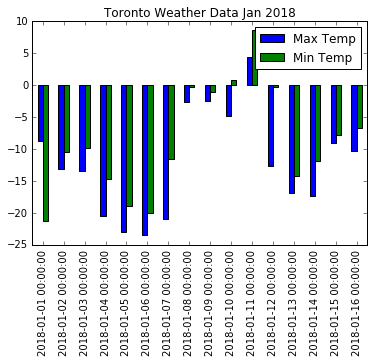

In [8]:
plt.figure(figsize=(40, 10)); df.plot(y=['Max Temp', 'Min Temp'],use_index=True, kind='bar'); plt.legend(title);plt.title('Toronto Weather Data Jan 2018');